# Proyecto de Clasificación con árbol de decisión con scikit-learn

En este notebook vamos a ver cómo entrenar un árbol de decisión con scikit-learn. Vamos a usar el dataset de car evaluation que se encuentra en el siguiente enlace: [Car Evaluation Dataset](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
## Algunos Recursos

- [Documentación de scikit-learn](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)
- [Plot  Tree](https://scikit-learn.org/stable/modules/tree.html#alternative-ways-to-export-trees)
- [Exaamples](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial)
- [Codificar variables categóricas 1](https://pbpython.com/categorical-encoding.html)
- [Codificar variables categóricas 2](https://practicaldatascience.co.uk/machine-learning/how-to-encode-categorical-variables-for-machine-learning)


## Resumen

1. Importar las librerías necesarias
2. Cargar el dataset
3. Preprocesar el dataset y EDA
4. Entrenar el modelo
5. Evaluar el modelo

## 1. Importar las librerías necesarias



In [2]:
#Importamos las librerias principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos las librerias de sklearn para el modelo clasificador
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# desbalanceo de clases
from imblearn.under_sampling import RandomUnderSampler

# grid search
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')


## Cargar el dataset

Utilizaremos el dataset de car evaluation que se encuentra en el siguiente enlace: [Car Evaluation Dataset](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

El dataset tiene las siguientes columnas:

- buying: vhigh, high, med, low.
- maint: vhigh, high, med, low.
- doors: 2, 3, 4, 5more.
- persons: 2, 4, more.
- lug_boot: small, med, big.
- safety: low, med, high.
- class: unacc, acc, good, vgood.



In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']

df.columns = columns_names

In [4]:
df.head()

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Preprocesamiento y EDA

Dentros del Preprocesamiento de los datos se debe de asegurar:

- Eliminar duplicados
- Evaluar nulos
- Evaluar Undersampling o Oversampling
- Remover columnas innecesarias(codigo, id, etc)
- Remover outliers
- Normalizar  o Estandarizar o Escalar los datos
- Crear variables dummy
- Crear variables polinomiales

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# veamos "doors" y "persons" categorias
print(df.doors.value_counts())
print(df.persons.value_counts())


doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64


In [7]:
# verificar datos nulos
df.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

Resumen incial de los datos:

- No hay nulos
- Hay 7 columnas, con Class como la variable objetivo
- Todas las columnas son categóricas

In [8]:
df.describe()

,price,maint,doors,persons,lug_boot,safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [9]:
# verificamos si hay duplicados y los eliminamos
df.duplicated().sum()

0

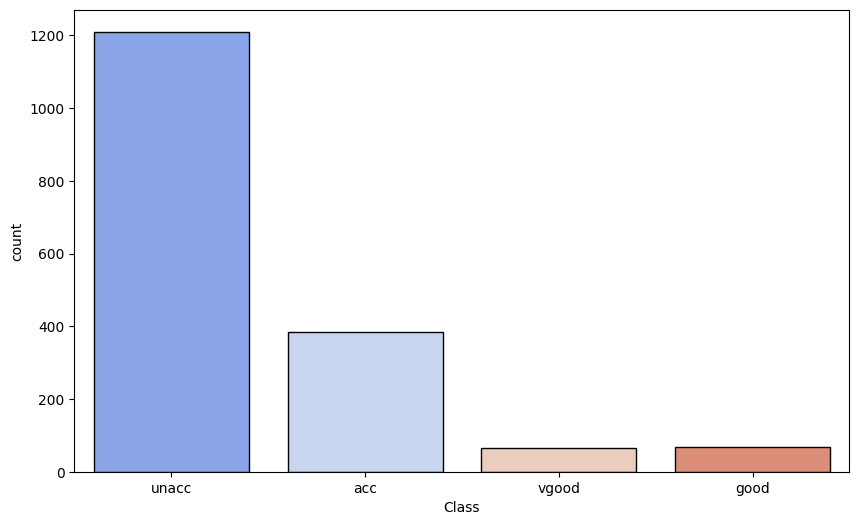

In [10]:
# visualizamos la distribución de las clases verticalmente
plt.figure(figsize=(10,6))

sns.countplot(data=df,x='Class', palette='coolwarm', edgecolor='black', )
plt.show()

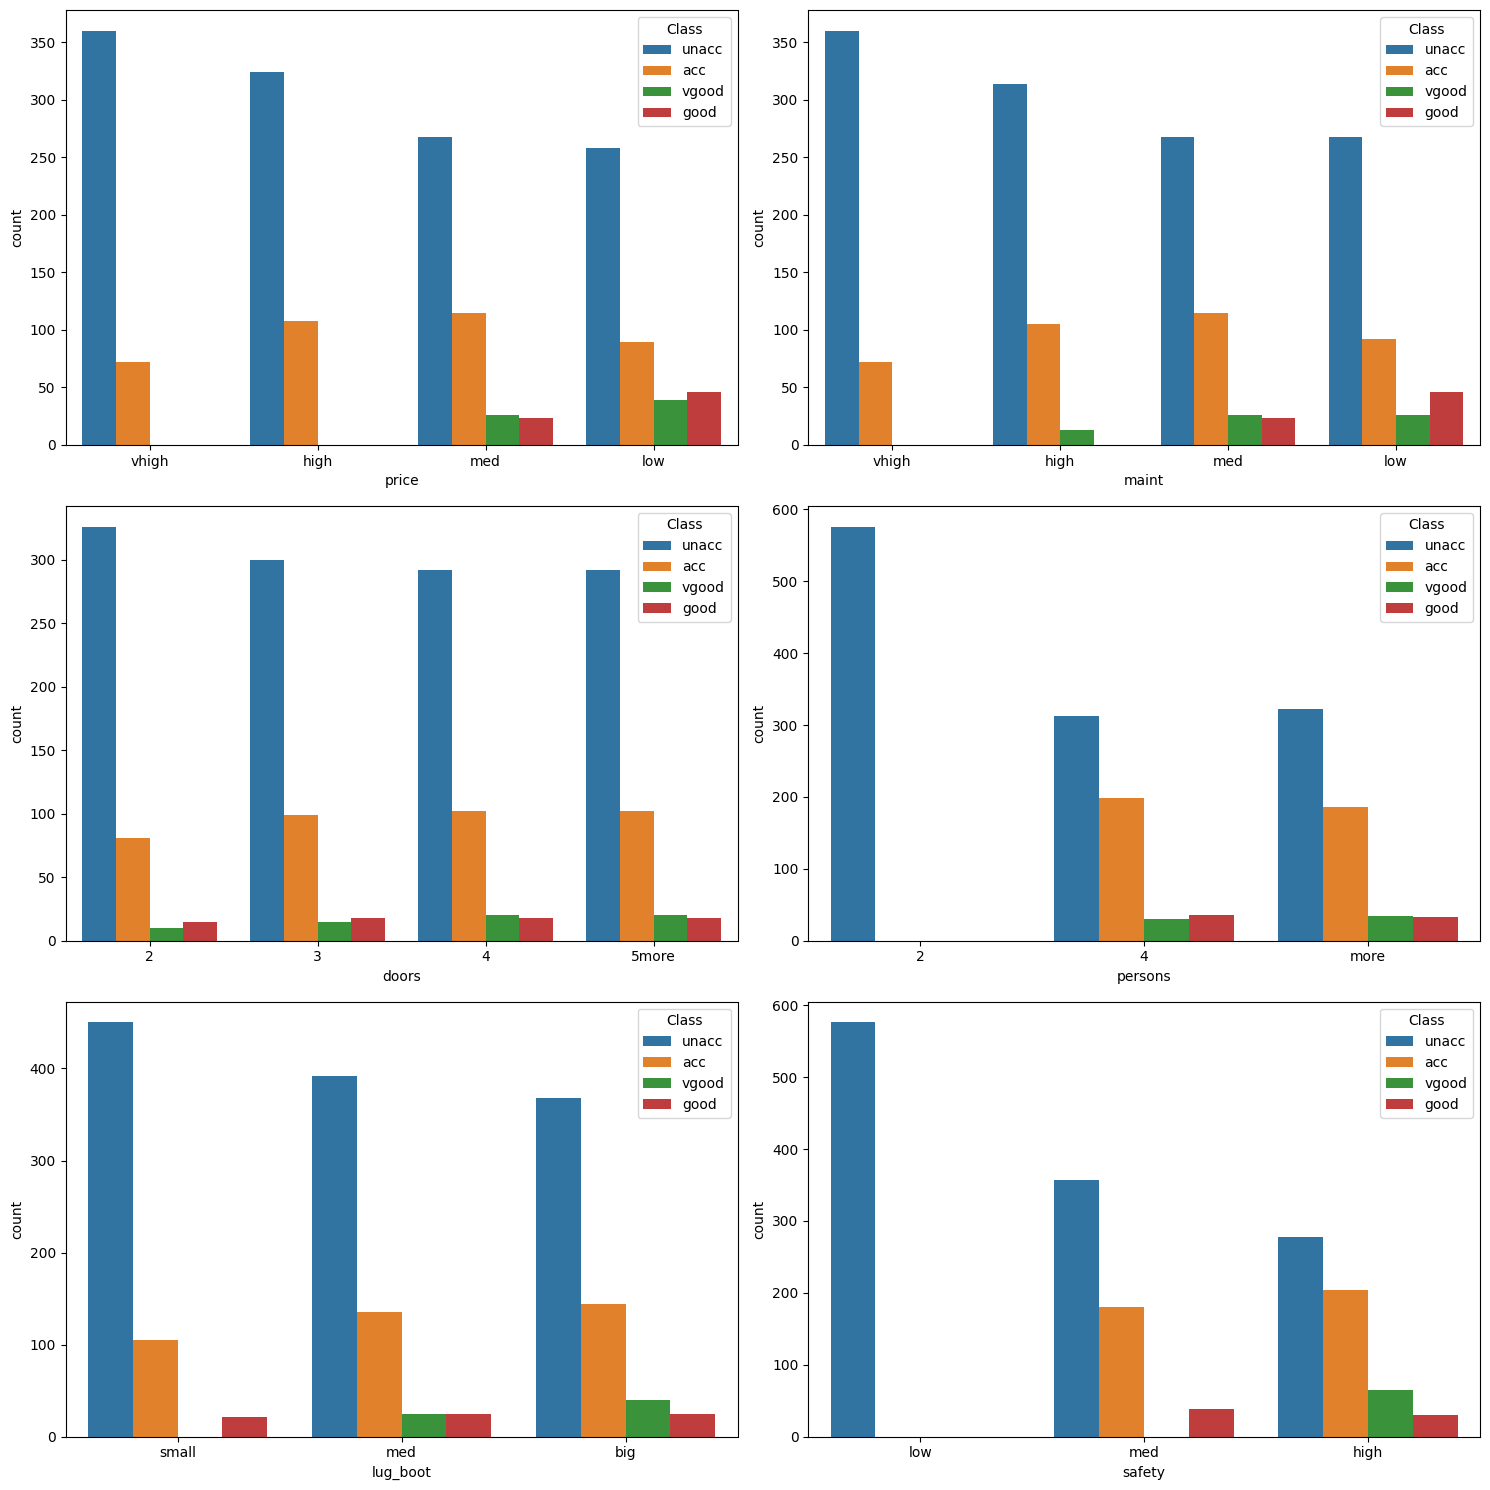

In [11]:
# hacer countplot con hue = 'Class' y usar subplots

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

for ax, column in zip(axes.flatten(), df.columns):
    sns.countplot(x=column, data=df, ax=ax, hue='Class')

plt.tight_layout()
plt.show()

Conclusiones del EDA:

- Las variables son categóricas ordinales
- La variable objetivo es multiclase
- Hay 4 clases en la variable objetivo, pero están desbalanceadas, la clase mayoritaria es unacc

In [12]:
# separar las variables dependientes e independientes
X = df.drop('Class', axis=1)
y = df['Class']


In [13]:
#make train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
# se puede hacer un train test split con stratify = y para mantener la proporcion de las clases
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
# random_state=23, stratify=y)

## Entrenar el modelo

In [14]:
# Codificar las variables categóricas
# https://practicaldatascience.co.uk/machine-learning/how-to-encode-categorical-variables-for-machine-learning
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head()

,price,maint,doors,persons,lug_boot,safety
0,2.0,1.0,2.0,1.0,2.0,0.0
1,1.0,2.0,2.0,2.0,1.0,2.0
2,0.0,1.0,3.0,0.0,1.0,0.0
3,2.0,0.0,2.0,2.0,2.0,0.0
4,3.0,1.0,2.0,2.0,1.0,0.0


Tambien se puede usar category_encoders para codificar las variables categóricas

```python
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
```



In [20]:
# entrenar el modelo
# max_depth = 3, se puede cambiar, se usa 3 para visualizar el árbol de decisión
# random_state = 23, se usa para la reproducibilidad del modelo
model = DecisionTreeClassifier(max_depth=4,random_state=23)

model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4, random_state=23)

In [21]:
# hacer predicciones
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)



## Evaluar el modelo

In [22]:
# evaluar el modelo
# accuracy
print('Accuracy en entrenamiento: ', accuracy_score(y_train, y_pred_train))
print('Accuracy en test: ', accuracy_score(y_test, y_pred))

Accuracy en entrenamiento:  0.8227206946454414
Accuracy en test:  0.8352601156069365


Es un accuracy de menos del 80%, se puede mejorar con un mejor preprocesamiento de los datos, o con un mejor ajuste de los hiperparámetros del modelo.

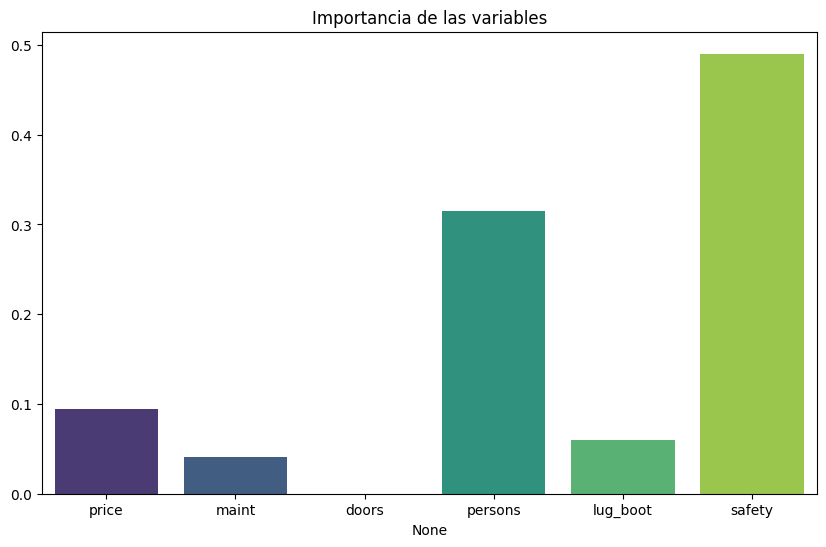

In [23]:
# visualiza features importance
plt.figure(figsize=(10,6))

sns.barplot(y=model.feature_importances_, x=X.columns, palette='viridis')
plt.title('Importancia de las variables')
plt.show()


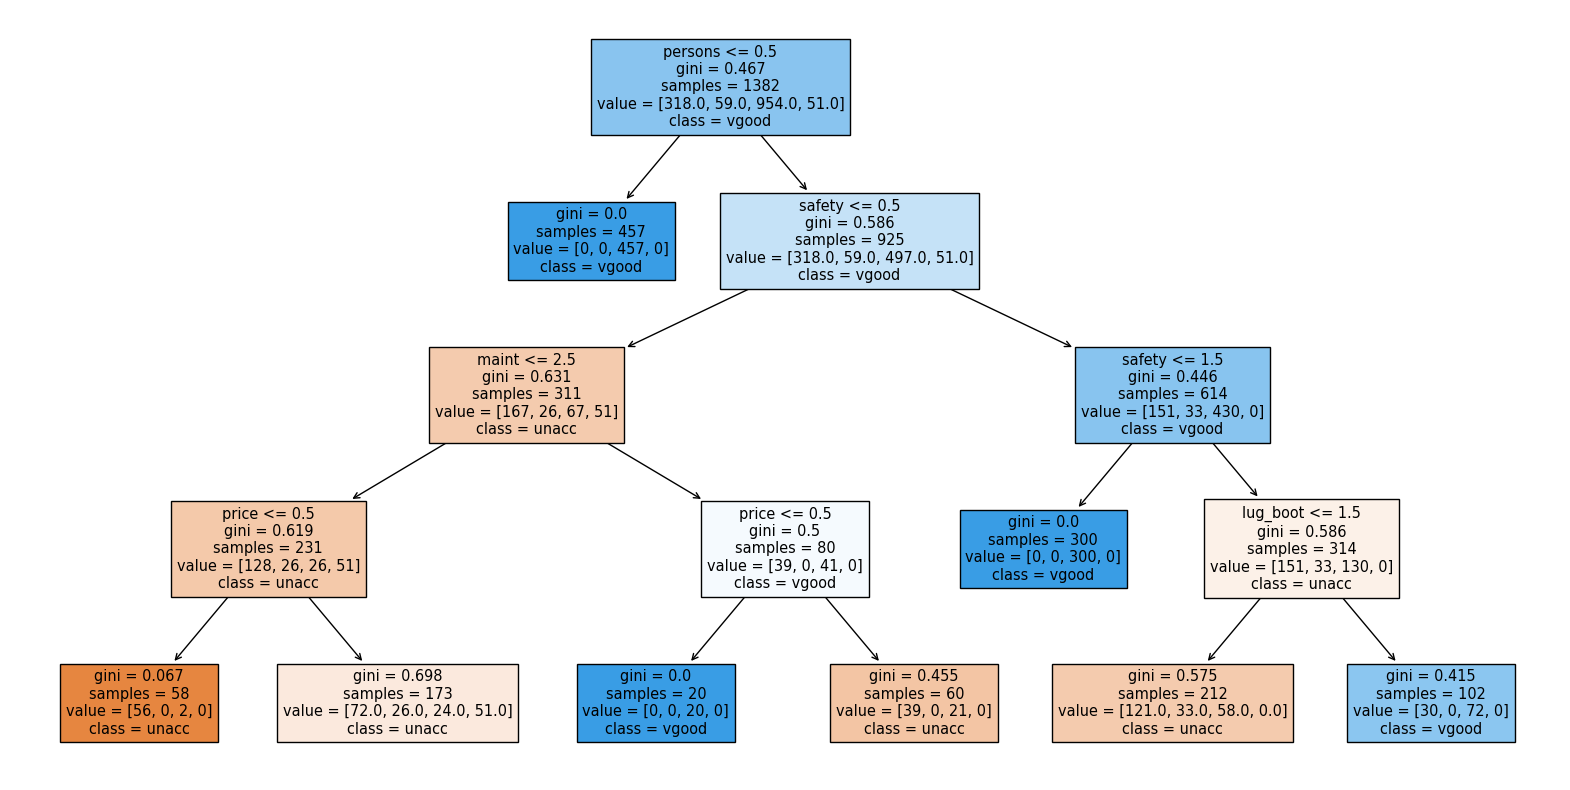

In [24]:
# ver el árbol de decisión
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(model, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

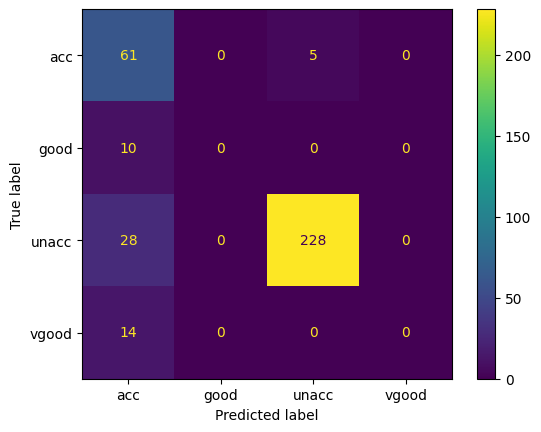

In [25]:
# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

Las variables mas importantes del modelo son:
 - safety
 - persons

## Conclusiones

- Se entrenó un modelo de árbol de decisión con scikit-learn
- Se evaluó el modelo con un accuracy de menos del 80%
- Se identificaron las variables más importantes del modelo
- Se puede mejorar el modelo con un mejor preprocesamiento de los datos o con un mejor ajuste de los hiperparámetros del modelo. En cuanto a preprocesamiento:
    - se puede probar con codificar las variables categóricas con un encoder distinto, 
    - o con un mejor manejo de los datos desbalanceados.
    - o con un mejor ajuste de los hiperparámetros del modelo. Los parametros que se pueden ver son:
        - criterion : {“gini”, “entropy”}, default=”gini”
        - splitter : {“best”, “random”}, default=”best”
        - max_depth : int, default=None
        - min_samples_split : int or float, default=2
        - min_samples_leaf : int or float, default=1

        
